In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import DenseNet121, ResNet50, VGG16, MobileNetV2, EfficientNetB0
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import tensorflow as tf

In [2]:
 #Set paths
train_dir = "C:\\Users\\hp\\Desktop\\finalproject\\train"
test_dir = "C:\\Users\\hp\\Desktop\\finalproject\\test"
model_save_path = "C:\\Users\\hp\\Desktop\\finalproject\\test\\happy"

In [3]:
# Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

In [4]:
# Data Preparation
def prepare_data():
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_data = datagen.flow_from_directory(
        train_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training'
    )

    val_data = datagen.flow_from_directory(
        train_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation'
    )

    return train_data, val_data

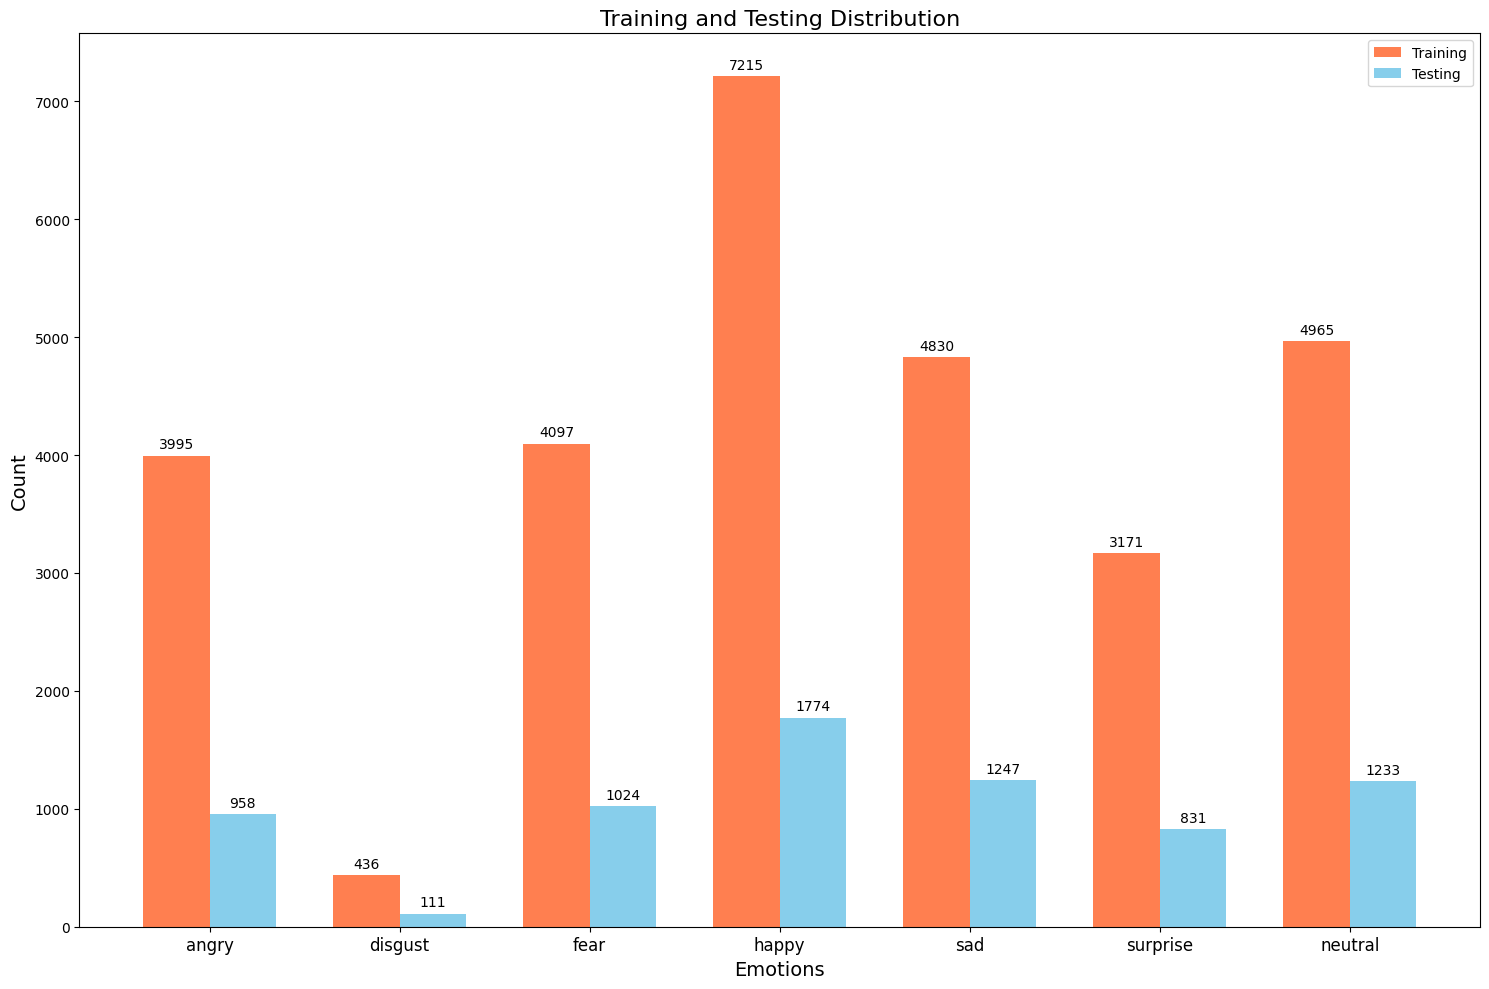

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace these with your actual counts)
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
train_counts = [3995, 436, 4097, 7215, 4830, 3171, 4965]
test_counts = [958, 111, 1024, 1774, 1247, 831, 1233]

# Define bar width
bar_width = 0.35
x = np.arange(len(emotion_labels))

# Create figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

# Plotting training counts
bars1 = ax.bar(x - bar_width / 2, train_counts, bar_width, label='Training', color='coral')

# Plotting testing counts
bars2 = ax.bar(x + bar_width / 2, test_counts, bar_width, label='Testing', color='skyblue')

# Adding labels and title
ax.set_xlabel('Emotions', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Training and Testing Distribution', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(emotion_labels, fontsize=12)
ax.legend()

# Adding the count labels on top of the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

add_value_labels(bars1)
add_value_labels(bars2)

# Show the plot
plt.tight_layout()
plt.show()


In [6]:
# Custom CNN Model
def build_custom_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(5, activation='softmax')  # Assuming 5 classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:
# Train Model
def train_model(model, train_data, val_data):
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(train_data, validation_data=val_data, epochs=EPOCHS, callbacks=[early_stop])
    return history

In [8]:
# Plotting training history
def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 5))

    # Plotting accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [9]:
# Main execution
train_data, val_data = prepare_data()

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [10]:
# Custom CNN Model
def build_custom_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(7, activation='softmax')  # Updated to 7 units for 7 classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [11]:
# DenseNet Model
def build_densenet():
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)  # Output layer for 7 classes
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [12]:
# MobileNet Model
def build_mobilenet():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)  # Output layer for 7 classes
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
# EfficientNet Model
def build_efficientnet():
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)  # Output layer for 7 classes
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
# VGG Model
def build_vgg():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)  # Output layer for 7 classes
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
# ResNet Model
def build_resnet():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)  # Output layer for 7 classes
    model = Model(inputs=base_model.input, outputs=predictions)
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 444s 616ms/step - accuracy: 0.2614 - loss: 2.0931 - val_accuracy: 0.3740 - val_loss: 1.6086
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 287s 400ms/step - accuracy: 0.3922 - loss: 1.5555 - val_accuracy: 0.4146 - val_loss: 1.5025
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 288s 401ms/step - accuracy: 0.4742 - loss: 1.3739 - val_accuracy: 0.4365 - val_loss: 1.4597
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 287s 400ms/step - accuracy: 0.5556 - loss: 1.1657 - val_accuracy: 0.4416 - val_loss: 1.5098
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 303s 422ms/step - accuracy: 0.6371 - loss: 0.9600 - val_accuracy: 0.4466 - val_loss: 1.5655
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 283s 394ms/step - accuracy: 0.7089 - loss: 0.7703 - val_accuracy: 0.4511 - val_loss: 1.7333


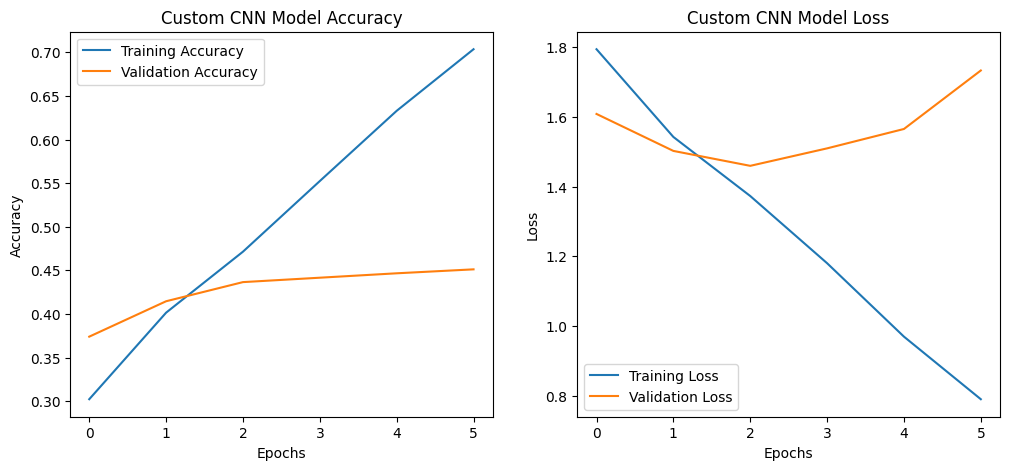

In [16]:
# Training each model
# Custom CNN
custom_cnn_model = build_custom_cnn()
custom_cnn_history = train_model(custom_cnn_model, train_data, val_data)
plot_training_history(custom_cnn_history, "Custom CNN")

Epoch 1/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 1136s 2s/step - accuracy: 0.2699 - loss: 1.9736 - val_accuracy: 0.4309 - val_loss: 1.5237
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 1110s 2s/step - accuracy: 0.3898 - loss: 1.5974 - val_accuracy: 0.4356 - val_loss: 1.5041
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 1112s 2s/step - accuracy: 0.4007 - loss: 1.5654 - val_accuracy: 0.4576 - val_loss: 1.4659
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 1113s 2s/step - accuracy: 0.4058 - loss: 1.5607 - val_accuracy: 0.4374 - val_loss: 1.4811
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 1095s 2s/step - accuracy: 0.3936 - loss: 1.5714 - val_accuracy: 0.4501 - val_loss: 1.4570
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 1095s 2s/step - accuracy: 0.3989 - loss: 1.5693 - val_accuracy: 0.4527 - val_loss: 1.4486
Epoch 7/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 1097s 2s/step - accuracy: 0.4124 - loss: 1.5497 - val_accuracy: 0.4511 - val_loss: 1.4754
Epoch 8/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 1095s 2s/step - accuracy: 0.4118 - loss: 1.5396 - 

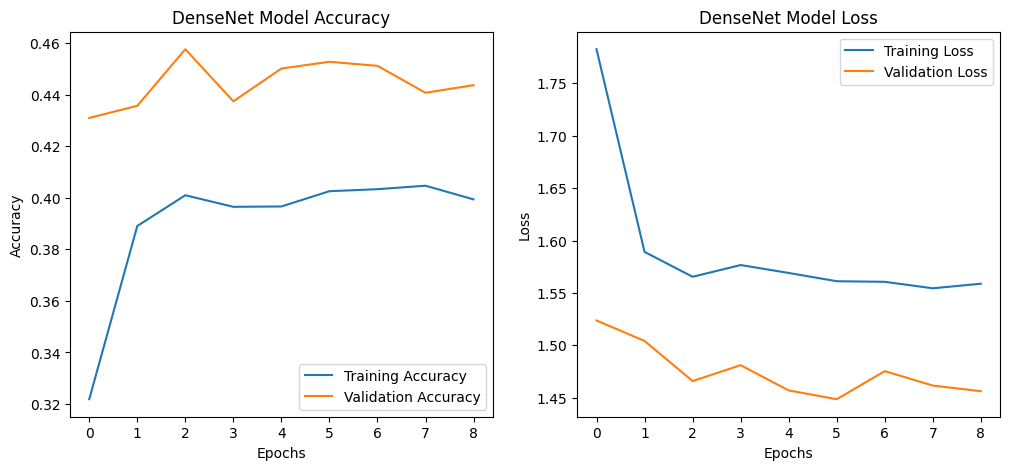

In [17]:
# DenseNet
densenet_model = build_densenet()
densenet_history = train_model(densenet_model, train_data, val_data)
plot_training_history(densenet_history, "DenseNet")


Epoch 1/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 280s 387ms/step - accuracy: 0.2822 - loss: 2.0376 - val_accuracy: 0.3931 - val_loss: 1.5441
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 276s 384ms/step - accuracy: 0.3954 - loss: 1.5879 - val_accuracy: 0.4234 - val_loss: 1.4877
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 275s 383ms/step - accuracy: 0.4052 - loss: 1.5570 - val_accuracy: 0.4367 - val_loss: 1.4631
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 276s 385ms/step - accuracy: 0.4107 - loss: 1.5441 - val_accuracy: 0.4358 - val_loss: 1.4707
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 275s 383ms/step - accuracy: 0.4082 - loss: 1.5523 - val_accuracy: 0.4125 - val_loss: 1.5077
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 275s 383ms/step - accuracy: 0.4200 - loss: 1.5355 - val_accuracy: 0.4198 - val_loss: 1.5194


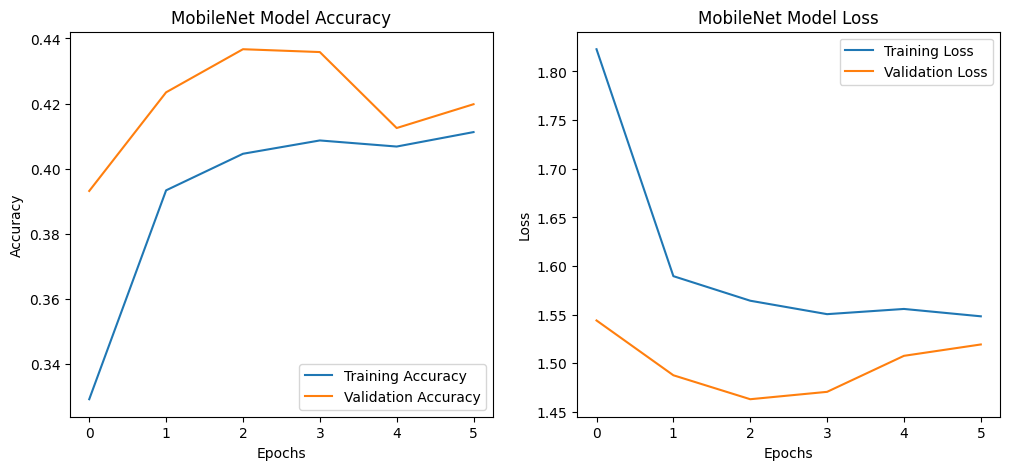

In [18]:
# MobileNet
mobilenet_model = build_mobilenet()
mobilenet_history = train_model(mobilenet_model, train_data, val_data)
plot_training_history(mobilenet_history, "MobileNet")

Epoch 1/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 380s 521ms/step - accuracy: 0.2158 - loss: 1.8504 - val_accuracy: 0.2513 - val_loss: 1.8203
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 367s 511ms/step - accuracy: 0.2313 - loss: 1.8374 - val_accuracy: 0.2513 - val_loss: 1.8302
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 367s 511ms/step - accuracy: 0.2305 - loss: 1.8416 - val_accuracy: 0.2513 - val_loss: 1.8150
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 367s 511ms/step - accuracy: 0.2327 - loss: 1.8358 - val_accuracy: 0.2513 - val_loss: 1.8265
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 366s 510ms/step - accuracy: 0.2171 - loss: 1.8438 - val_accuracy: 0.2513 - val_loss: 1.8149
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 368s 512ms/step - accuracy: 0.2290 - loss: 1.8382 - val_accuracy: 0.2513 - val_loss: 1.8178
Epoch 7/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 361s 503ms/step - accuracy: 0.2319 - loss: 1.8395 - val_accuracy: 0.2513 - val_loss: 1.8310
Epoch 8/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 386s 537ms/step - accuracy: 0.2280 -

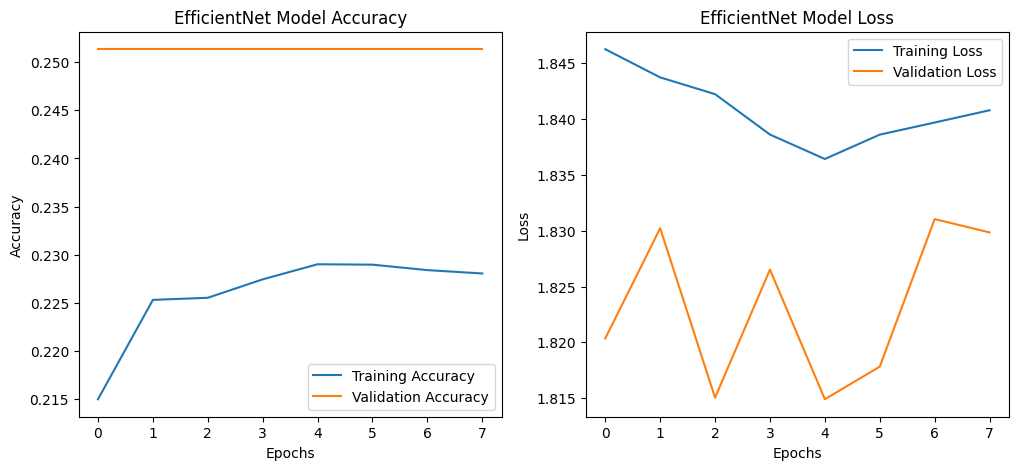

: 

In [19]:

# EfficientNet
efficientnet_model = build_efficientnet()
efficientnet_history = train_model(efficientnet_model, train_data, val_data)
plot_training_history(efficientnet_history, "EfficientNet")

Epoch 1/10


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


718/718 ━━━━━━━━━━━━━━━━━━━━ 3096s 4s/step - accuracy: 0.2271 - loss: 1.8612 - val_accuracy: 0.2808 - val_loss: 1.7329
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 3113s 4s/step - accuracy: 0.2889 - loss: 1.7399 - val_accuracy: 0.3308 - val_loss: 1.7007
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 3110s 4s/step - accuracy: 0.3109 - loss: 1.7107 - val_accuracy: 0.3480 - val_loss: 1.6849
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 3107s 4s/step - accuracy: 0.3187 - loss: 1.6964 - val_accuracy: 0.3534 - val_loss: 1.6726
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 3108s 4s/step - accuracy: 0.3246 - loss: 1.6857 - val_accuracy: 0.3513 - val_loss: 1.6639
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 3104s 4s/step - accuracy: 0.3308 - loss: 1.6765 - val_accuracy: 0.3478 - val_loss: 1.6554
Epoch 7/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 3105s 4s/step - accuracy: 0.3374 - loss: 1.6724 - val_accuracy: 0.3700 - val_loss: 1.6482
Epoch 8/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 3105s 4s/step - accuracy: 0.3319 - loss: 1.6670 - val_accurac

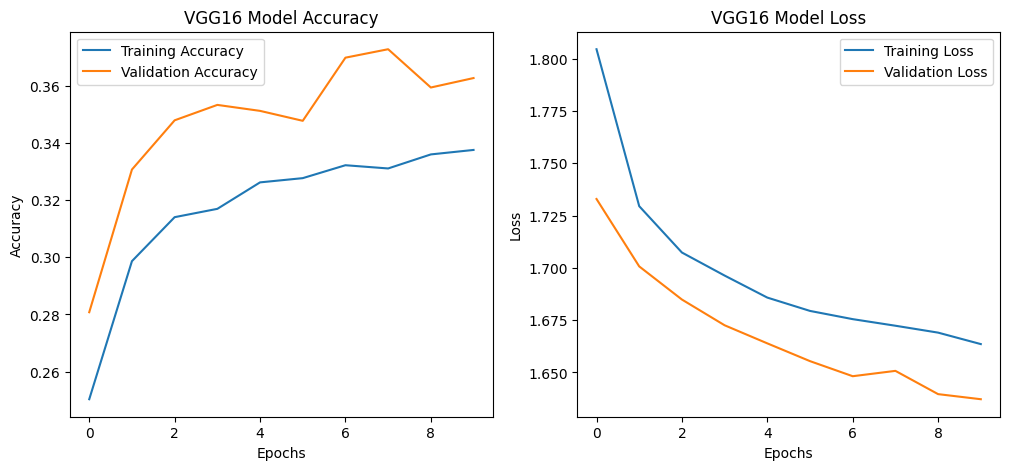

In [16]:
# VGG
vgg_model = build_vgg()
vgg_history = train_model(vgg_model, train_data, val_data)
plot_training_history(vgg_history, "VGG16")

Epoch 1/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 1097s 2s/step - accuracy: 0.2069 - loss: 1.9212 - val_accuracy: 0.2519 - val_loss: 1.8118
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 1098s 2s/step - accuracy: 0.2402 - loss: 1.8142 - val_accuracy: 0.2613 - val_loss: 1.7819
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 1099s 2s/step - accuracy: 0.2466 - loss: 1.8131 - val_accuracy: 0.2646 - val_loss: 1.7791
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 1099s 2s/step - accuracy: 0.2462 - loss: 1.8071 - val_accuracy: 0.2569 - val_loss: 1.7879
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 1096s 2s/step - accuracy: 0.2559 - loss: 1.7986 - val_accuracy: 0.2604 - val_loss: 1.7811
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 1096s 2s/step - accuracy: 0.2652 - loss: 1.7926 - val_accuracy: 0.2688 - val_loss: 1.7666
Epoch 7/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 1095s 2s/step - accuracy: 0.2606 - loss: 1.7901 - val_accuracy: 0.2853 - val_loss: 1.7764
Epoch 8/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 1095s 2s/step - accuracy: 0.2594 - loss: 1.7884 - 

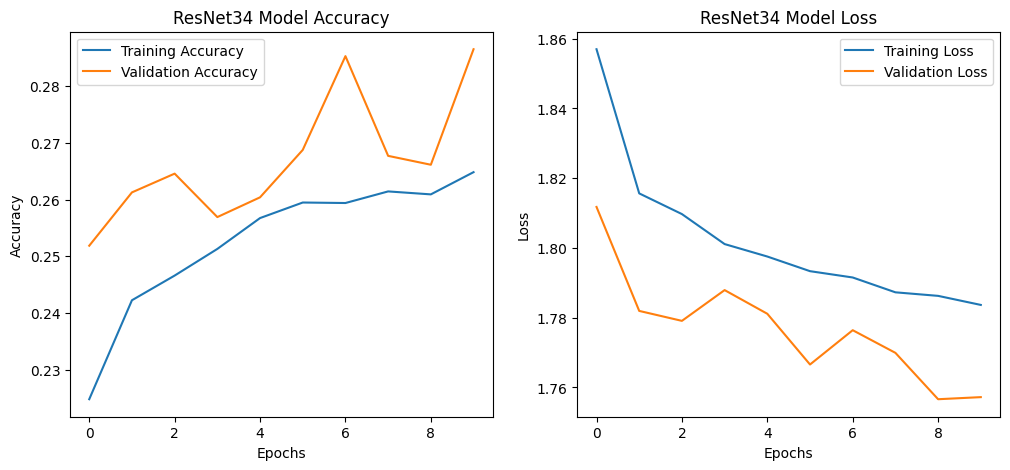

In [17]:

# ResNet
resnet_model = build_resnet()
resnet_history = train_model(resnet_model, train_data, val_data)
plot_training_history(resnet_history, "ResNet34")

In [5]:
# Function to evaluate performance metrics including ROC AUC score
def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test)
    predictions = model.predict(X_test)
    predicted_classes = np.argmax(predictions, axis=1)

    # Ensure y_test_classes is correctly formatted
    y_test_classes = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test 

    report = classification_report(y_test_classes, predicted_classes, zero_division=1)
    roc_auc = roc_auc_score(y_test, predictions, multi_class='ovr')
    
    return loss, accuracy, report, roc_auc

In [29]:
import os
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define the paths to your models
model_paths = [
    r"C:\Users\hp\Desktop\finalproject\custom_cnn_model.h5",
    r"C:\Users\hp\Desktop\finalproject\densenet_model.h5",
    r"C:\Users\hp\Desktop\finalproject\efficientnet_model.h5",
    r"C:\Users\hp\Desktop\finalproject\mobilenet_model.h5",
    r"C:\Users\hp\Desktop\finalproject\resnet_model.h5",
    r"C:\Users\hp\Desktop\finalproject\vgg_model.h5"
]

def adapt_and_compile_model(model_path, num_classes=7):
    print(f"Processing model: {model_path}")
    
    # Check if file exists
    if not os.path.exists(model_path):
        print(f"File does not exist: {model_path}")
        return None

    try:
        # Load the model
        base_model = load_model(model_path)
        
        # Get the output shape of the base model
        output_shape = base_model.output.shape

        # Determine if we need to add pooling and final dense layer
        if len(output_shape) == 4:  # If the output is still in image format (4D)
            x = GlobalAveragePooling2D()(base_model.output)
        else:  # If the output is already flattened or pooled (2D)
            x = base_model.output

        # Add the final dense layer if it's not already present or has wrong number of units
        if isinstance(base_model.layers[-1], Dense) and base_model.layers[-1].units == num_classes:
            predictions = base_model.output
        else:
            predictions = Dense(num_classes, activation='softmax')(x)

        # Create the new model
        model = Model(inputs=base_model.input, outputs=predictions)

        # Compile the model
        model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        print(f"Model compiled successfully: {model_path}")
        return model

    except Exception as e:
        print(f"Error processing model {model_path}: {str(e)}")
        return None

# Compile all models
compiled_models = {}
for path in model_paths:
    model_name = os.path.basename(path).split('.')[0]
    compiled_model = adapt_and_compile_model(path)
    if compiled_model:
        compiled_models[model_name] = compiled_model
        print(f"Model summary for {model_name}:")
        compiled_model.summary()
        print("\n" + "="*50 + "\n")

# Print summary of compiled models
print("\nSummary of compiled models:")
for name, model in compiled_models.items():
    print(f"- {name}: {type(model).__name__}")

print(f"\nTotal models compiled: {len(compiled_models)}")

Processing model: C:\Users\hp\Desktop\finalproject\custom_cnn_model.h5


Error processing model C:\Users\hp\Desktop\finalproject\custom_cnn_model.h5: The layer sequential has never been called and thus has no defined output.
Processing model: C:\Users\hp\Desktop\finalproject\densenet_model.h5


Model compiled successfully: C:\Users\hp\Desktop\finalproject\densenet_model.h5
Model summary for densenet_model:


Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 8,069,511 (30.78 MB)

 Trainable params: 7,985,863 (30.46 MB)

 Non-trainable params: 83,648 (326.75 KB)



Processing model: C:\Users\hp\Desktop\finalproject\efficientnet_model.h5


Model compiled successfully: C:\Users\hp\Desktop\finalproject\efficientnet_model.h5
Model summary for efficientnet_model:


Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_4[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 5,337,578 (20.36 MB)

 Trainable params: 5,295,555 (20.20 MB)

 Non-trainable params: 42,023 (164.16 KB)



Processing model: C:\Users\hp\Desktop\finalproject\mobilenet_model.h5


Model compiled successfully: C:\Users\hp\Desktop\finalproject\mobilenet_model.h5
Model summary for mobilenet_model:


Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,545,991 (13.53 MB)

 Trainable params: 3,511,879 (13.40 MB)

 Non-trainable params: 34,112 (133.25 KB)



Processing model: C:\Users\hp\Desktop\finalproject\resnet_model.h5


Model compiled successfully: C:\Users\hp\Desktop\finalproject\resnet_model.h5
Model summary for resnet_model:


Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,643,719 (97.82 MB)

 Trainable params: 25,590,599 (97.62 MB)

 Non-trainable params: 53,120 (207.50 KB)



Processing model: C:\Users\hp\Desktop\finalproject\vgg_model.h5


Model compiled successfully: C:\Users\hp\Desktop\finalproject\vgg_model.h5
Model summary for vgg_model:


Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 7)              │         7,007 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,364,551 (527.82 MB)

 Trainable params: 138,364,551 (527.82 MB)

 Non-trainable params: 0 (0.00 B)




Summary of compiled models:
- densenet_model: Functional
- efficientnet_model: Functional
- mobilenet_model: Functional
- resnet_model: Functional
- vgg_model: Functional

Total models compiled: 5


In [37]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Load test dataset
test_data_dir = "C:/Users/hp/Desktop/finalproject/test"  # Path to your test dataset
image_size = (224, 224)  # Adjust based on your model input size
batch_size = 32

# Load the test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

# Define the model paths
model_paths = [
    "C:/Users/hp/Desktop/finalproject/custom_cnn_model.h5",
    "C:/Users/hp/Desktop/finalproject/densenet_model.h5",
    "C:/Users/hp/Desktop/finalproject/efficientnet_model.h5",
    "C:/Users/hp/Desktop/finalproject/mobilenet_model.h5",
    "C:/Users/hp/Desktop/finalproject/resnet_model.h5",
    "C:/Users/hp/Desktop/finalproject/vgg_model.h5"
]

# Iterate through each model path and evaluate the model
for model_path in model_paths:
    print(f"Evaluating model: {model_path}")

    # Load the model
    model = tf.keras.models.load_model(model_path)

    # Compile the model (necessary for evaluation)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Get true labels from the test dataset
    true_labels = np.concatenate([y.numpy() for x, y in test_dataset], axis=0)

    # Get predictions
    predictions = model.predict(test_dataset)
    predicted_labels = np.argmax(predictions, axis=1)

    # Calculate precision, recall, and F1 score
    report = classification_report(true_labels, predicted_labels, output_dict=True)
    
    # Print precision, recall, and F1 score for each class
    for class_id, metrics in report.items():
        if isinstance(metrics, dict):
            print(f"Class: {class_id}")
            print(f"Precision: {metrics['precision']:.4f}")
            print(f"Recall: {metrics['recall']:.4f}")
            print(f"F1 Score: {metrics['f1-score']:.4f}")
            print()

    print("="*50)


Found 7179 files belonging to 7 classes.
Evaluating model: C:/Users/hp/Desktop/finalproject/custom_cnn_model.h5


225/225 ━━━━━━━━━━━━━━━━━━━━ 78s 341ms/step
Class: 0
Precision: 0.1241
Recall: 0.4332
F1 Score: 0.1930

Class: 1
Precision: 0.0135
Recall: 0.4375
F1 Score: 0.0263

Class: 2
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 3
Precision: 0.6667
Recall: 0.0011
F1 Score: 0.0023

Class: 4
Precision: 0.1493
Recall: 0.0162
F1 Score: 0.0293

Class: 5
Precision: 0.1875
Recall: 0.0048
F1 Score: 0.0094

Class: 6
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 9
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: macro avg
Precision: 0.1426
Recall: 0.1116
F1 Score: 0.0325

Class: weighted avg
Precision: 0.2397
Recall: 0.0685
F1 Score: 0.0334

Evaluating model: C:/Users/hp/Desktop/finalproject/densenet_model.h5


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

225/225 ━━━━━━━━━━━━━━━━━━━━ 311s 1s/step
Class: 0
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 1
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 2
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 3
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 4
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 5
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 6
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 56
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 111
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 398
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 409
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 423
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 457
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 479
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 504
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 512
Precision: 0.0000
Recall: 0.0000

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

225/225 ━━━━━━━━━━━━━━━━━━━━ 105s 460ms/step
Class: 0
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 1
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 2
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 3
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 4
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 5
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 6
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 69
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 111
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 117
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 126
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 149
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 151
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 152
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 153
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 154
Precision: 0.0000
Recall: 0.0

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

225/225 ━━━━━━━━━━━━━━━━━━━━ 81s 355ms/step
Class: 0
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 1
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 2
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 3
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 4
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 5
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 6
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 53
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 314
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 417
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 418
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 443
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 446
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 488
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 512
Precision: 0.0000
Recall: 0.00

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

225/225 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step
Class: 0
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 1
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 2
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 3
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 4
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 5
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 6
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 111
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 117
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 149
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 151
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 152
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 153
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 155
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 188
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 190
Precision: 0.0000
Recall: 0.000

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

225/225 ━━━━━━━━━━━━━━━━━━━━ 830s 4s/step
Class: 0
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 1
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 2
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 3
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 4
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 5
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 6
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 111
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 117
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 126
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 149
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 152
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 158
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 190
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 216
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 252
Precision: 0.0000
Recall: 0.000

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

Found 7179 files belonging to 7 classes.
Evaluating model: C:/Users/hp/Desktop/finalproject/custom_cnn_model.h5


225/225 ━━━━━━━━━━━━━━━━━━━━ 78s 341ms/step
Class: 0
Precision: 0.1241
Recall: 0.4332
F1 Score: 0.1930

Class: 1
Precision: 0.0135
Recall: 0.4375
F1 Score: 0.0263

Class: 2
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 3
Precision: 0.6667
Recall: 0.0011
F1 Score: 0.0023

Class: 4
Precision: 0.1493
Recall: 0.0162
F1 Score: 0.0293

Class: 5
Precision: 0.1875
Recall: 0.0048
F1 Score: 0.0094

Class: 6
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 9
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: macro avg
Precision: 0.1426
Recall: 0.1116
F1 Score: 0.0325

Class: weighted avg
Precision: 0.2397
Recall: 0.0685
F1 Score: 0.0334



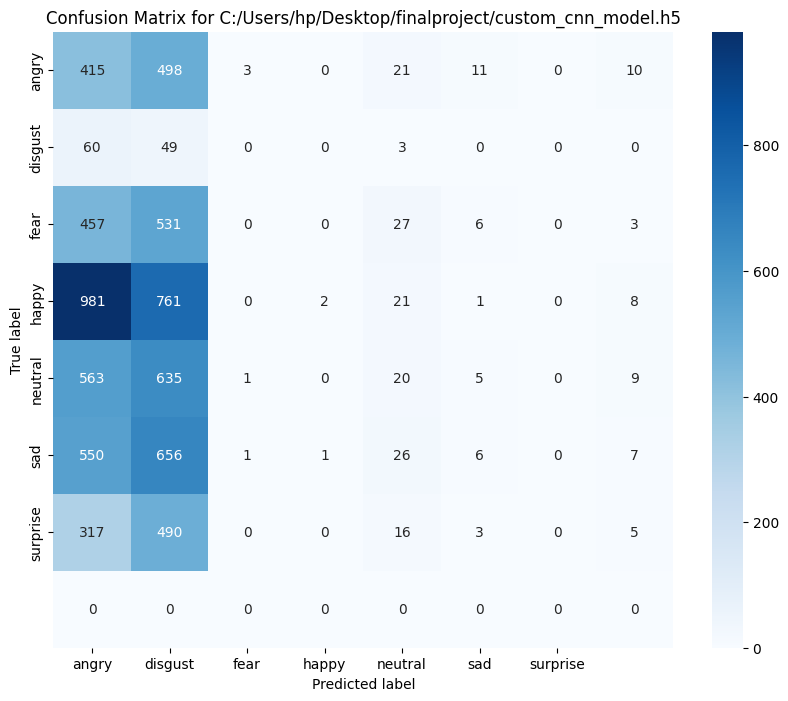

Evaluating model: C:/Users/hp/Desktop/finalproject/test/happy/densenet.h5


225/225 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step
Class: 0
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 1
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 2
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 3
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 4
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 5
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 6
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 56
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 111
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 398
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 409
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 423
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 457
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 479
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 504
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 512
Precision: 0.0000
Recall: 0.0000

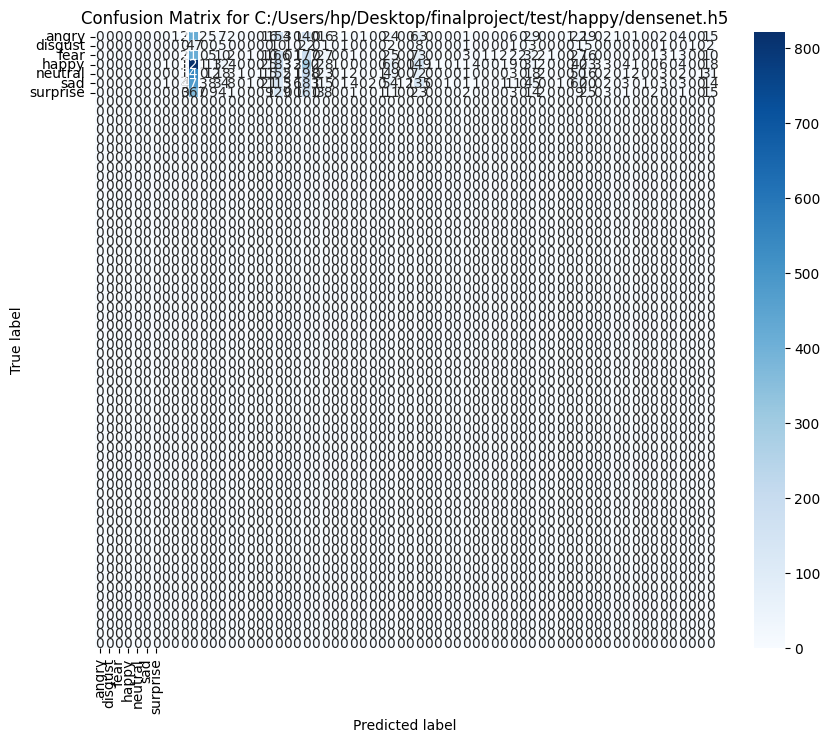

Evaluating model: C:/Users/hp/Desktop/finalproject/efficientnet_model.h5


225/225 ━━━━━━━━━━━━━━━━━━━━ 125s 548ms/step
Class: 0
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 1
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 2
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 3
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 4
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 5
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 6
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 69
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 111
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 117
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 126
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 149
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 151
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 152
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 153
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 154
Precision: 0.0000
Recall: 0.0

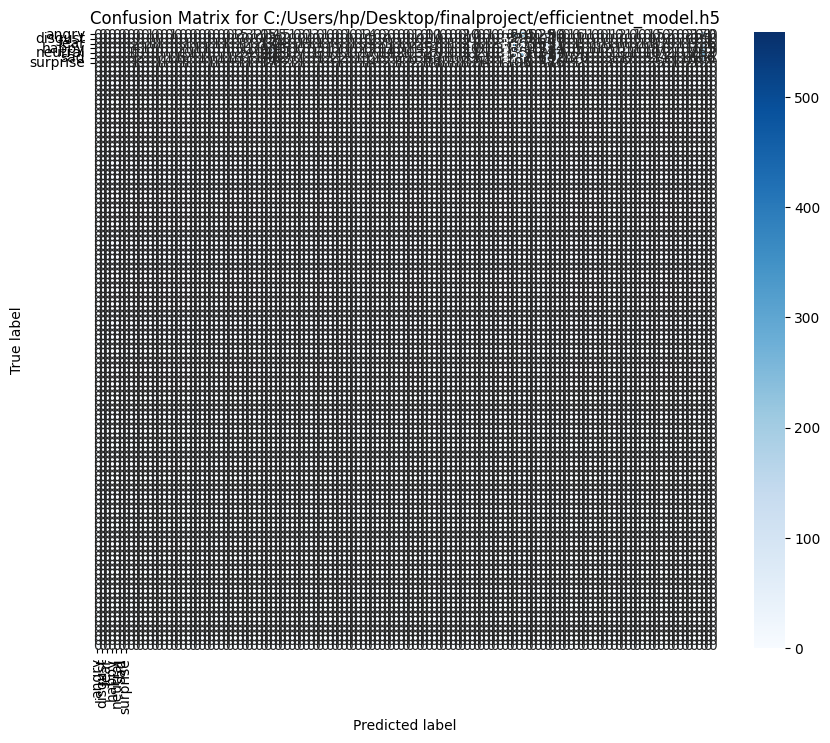

Evaluating model: C:/Users/hp/Desktop/finalproject/mobilenet_model.h5


225/225 ━━━━━━━━━━━━━━━━━━━━ 106s 466ms/step
Class: 0
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 1
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 2
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 3
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 4
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 5
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 6
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 53
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 314
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 417
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 418
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 424
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 443
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 446
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 488
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 512
Precision: 0.0000
Recall: 0.0

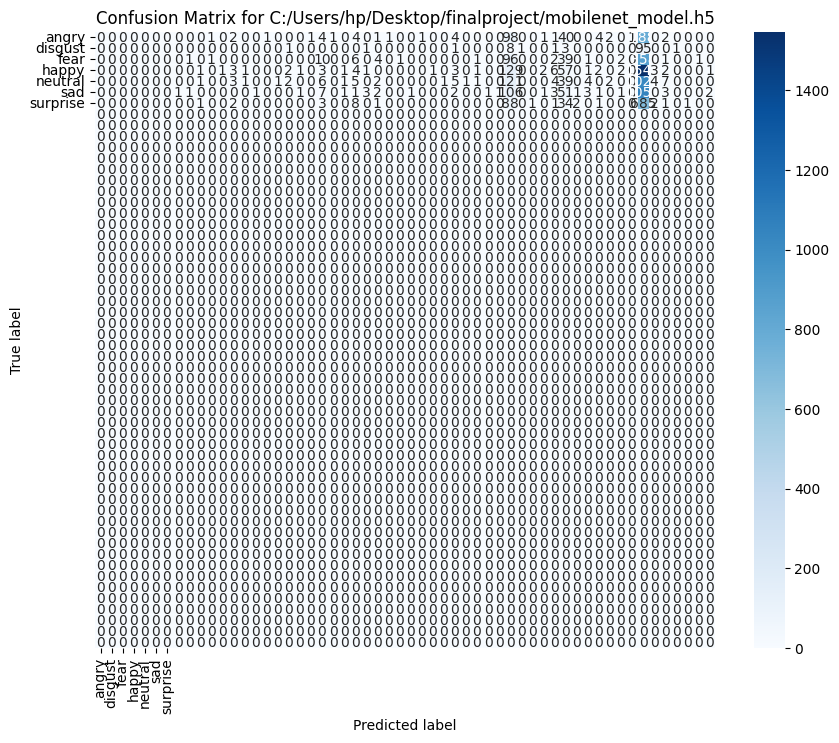

Evaluating model: C:/Users/hp/Desktop/finalproject/resnet_model.h5


225/225 ━━━━━━━━━━━━━━━━━━━━ 674s 3s/step
Class: 0
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 1
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 2
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 3
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 4
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 5
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 6
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 111
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 117
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 149
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 151
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 152
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 153
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 155
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 188
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 190
Precision: 0.0000
Recall: 0.000

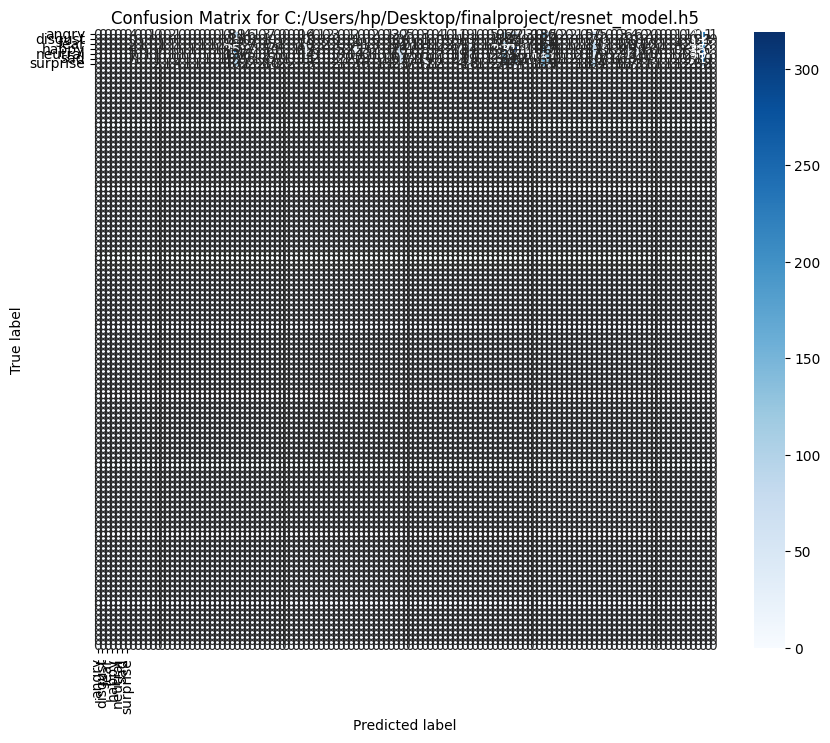

Evaluating model: C:/Users/hp/Desktop/finalproject/vgg_model.h5


225/225 ━━━━━━━━━━━━━━━━━━━━ 913s 4s/step
Class: 0
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 1
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 2
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 3
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 4
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 5
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 6
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 111
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 117
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 126
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 149
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 152
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 158
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 190
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 216
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Class: 252
Precision: 0.0000
Recall: 0.000

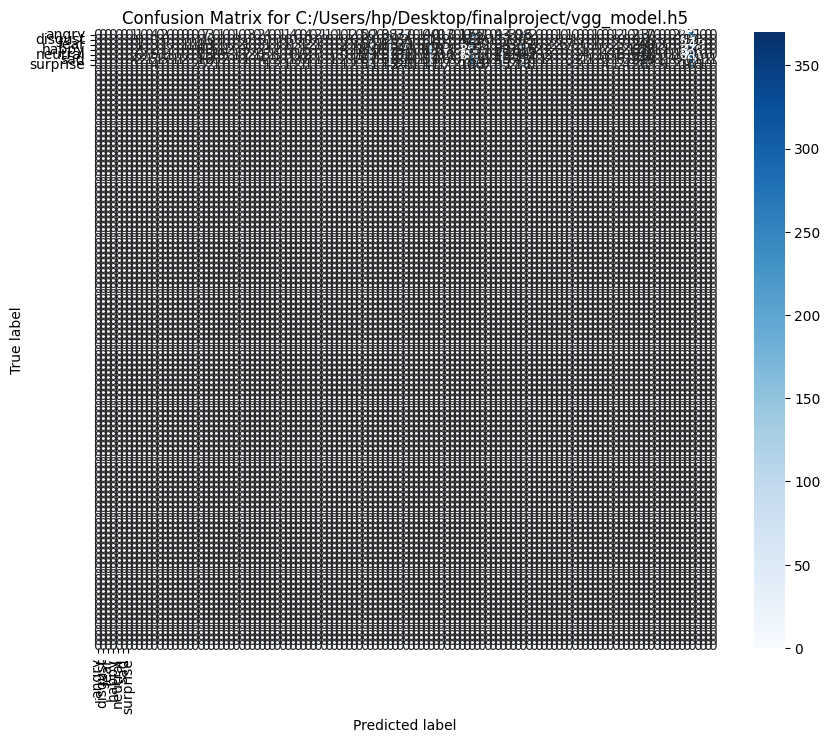

In [38]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load test dataset
test_data_dir = "C:/Users/hp/Desktop/finalproject/test"
image_size = (224, 224)
batch_size = 32

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

model_paths = [
    "C:/Users/hp/Desktop/finalproject/custom_cnn_model.h5",
    "C:/Users/hp/Desktop/finalproject/test/happy/densenet.h5",
    "C:/Users/hp/Desktop/finalproject/efficientnet_model.h5",
    "C:/Users/hp/Desktop/finalproject/mobilenet_model.h5",
    "C:/Users/hp/Desktop/finalproject/resnet_model.h5",
    "C:/Users/hp/Desktop/finalproject/vgg_model.h5"
]

for model_path in model_paths:
    print(f"Evaluating model: {model_path}")

    # Load the model
    model = tf.keras.models.load_model(model_path)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    true_labels = np.concatenate([y.numpy() for x, y in test_dataset], axis=0)
    predictions = model.predict(test_dataset)
    predicted_labels = np.argmax(predictions, axis=1)

    # Print classification report
    report = classification_report(true_labels, predicted_labels, output_dict=True, zero_division=0)

    for class_id, metrics in report.items():
        if isinstance(metrics, dict):
            print(f"Class: {class_id}")
            print(f"Precision: {metrics['precision']:.4f}")
            print(f"Recall: {metrics['recall']:.4f}")
            print(f"F1 Score: {metrics['f1-score']:.4f}\n")

    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.class_names, yticklabels=test_dataset.class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f'Confusion Matrix for {model_path}')
    plt.show()

    print("=" * 50)


In [2]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score
import tensorflow as tf

# Function to load the model
def load_model(model_path):
    return tf.keras.models.load_model(model_path)

# Function to evaluate the model
def evaluate_model(model, test_data):
    # Get the true labels
    y_true = test_data.classes
    
    # Ensure that the number of classes matches the model's output
    num_classes = model.output_shape[1]
    y_true_one_hot = tf.keras.utils.to_categorical(y_true, num_classes=num_classes)
    
    # Evaluate the model to get loss and accuracy
    loss, accuracy = model.evaluate(test_data)
    
    # Predict probabilities for each class
    y_pred = model.predict(test_data)
    
    # Get the predicted class labels
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Calculate ROC AUC score
    try:
        roc_auc = roc_auc_score(y_true_one_hot, y_pred, multi_class='ovr')
    except ValueError:
        roc_auc = None  # If the ROC AUC cannot be computed
    
    # Generate classification report
    report = classification_report(y_true, y_pred_classes, target_names=list(test_data.class_indices.keys()))
    
    return loss, accuracy, report, roc_auc

# Paths to the model files
model_paths = [
    "C:/Users/hp/Desktop/finalproject/test/happy/custom_cnn.h5",
    "C:/Users/hp/Desktop/finalproject/test/happy/densenet.h5",
    "C:/Users/hp/Desktop/finalproject/test/happy/efficientnet.h5",
    "C:/Users/hp/Desktop/finalproject/test/happy/mobilenet.h5",
    "C:/Users/hp/Desktop/finalproject/test/happy/resnet.h5",
    "C:/Users/hp/Desktop/finalproject/test/happy/vgg.h5"
]

# Load test data using ImageDataGenerator
test_data_dir = "C:/Users/hp/Desktop/finalproject/test"
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),  # Adjust to your model's input size
    batch_size=32,
    class_mode='categorical',  # For multi-class classification
    shuffle=False
)

# Evaluate all models and store results
results = {}

for model_path in model_paths:
    print(f"Loading model from {model_path}...")
    model = load_model(model_path)
    
    print("Evaluating model...")
    loss, accuracy, report, roc_auc = evaluate_model(model, test_data)
    
    # Store results in a dictionary
    results[model_path] = {
        'loss': loss,
        'accuracy': accuracy,
        'classification_report': report,
        'roc_auc': roc_auc
    }
    
    print(f"Model: {model_path}")
    print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")
    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    else:
        print("ROC AUC could not be computed.")
    print(report)


Found 7179 images belonging to 7 classes.
Loading model from C:/Users/hp/Desktop/finalproject/test/happy/custom_cnn.h5...


Evaluating model...


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 7), output.shape=(None, 10)